In [1]:
%matplotlib inline
'''
Use %matplotlib inline instead of %matplotlib widget when preparing the final report. 
Otherwise the images are, unfortunately, not embedded in the pdf. 
'''

from importstatements import *
css_styling()

#Before running this exercise, place the content of the folder Ex2Data into 
#the same folder from which you run this ipynb file

## Module 2: Statistics and correlation
### Medical Signal Processing and Statistics (E010390)
#### Dept of Information Technology (UGent) and Dept of Electronics and Informatics (VUB)
Sarah Verhulst

<font color=blue>Students names and IDs: </font> <Br> Vincent Belpaire (02009131), <Br>Takuto Yamaguchi (02200943), <Br>Elise Taragola (02008750)
<Br><font color=blue>Academic Year </font>: 2022-2023

In [4]:
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import colors as colors
from scipy import stats
import statsmodels.api as sm
import scipy.io

### General info
In this exercise, you will get hands-on experience with available statistical tests which can be used to test for normality of a dataset or for correlation between variables. You will also get a flavor of hypothesis testing using either standard formula, python tests or resampling methods. Resampling methods can be used for a broad range of applications in data-science and will be further explored in later lab exercises.

### Check for normality of your dataset

The fruitfly dataset
Data are per diem number of eggs laid per female fruitfry for the first 14 days of life 
for 25 females in 3 genetic lines of the fruitfly Drosophila melanogaster
- column 1: RS-line, bred for resistance against DDT
- column 2: SS-line, bred for susceptability to DDT
- column 3: control group

In [5]:
dat=np.loadtxt('FRUITFLY.DAT', dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)

<div class="alert alert-info">

**Task**
    
Test whether the data in the RS group is normally distributed and compare the outcomes of different normality tests. Visualize the distribution of the RS-line data by plotting a histogram of the dataset (`plt.hist function`).

Test the normality of the given fruitfly data-set by applying: 
- the Kolmogorov Smirnov test (`stats.kstest`)
- the Kolmogorov Smirnov test after normalizing the data by its mean (`np.mean`) and standard deviation (`np.std`)
- by applying a lilliefors test (`sm.stats.lilliefors`). 

Now perform the same analysis for an arbitrary normal random-number dataset of 100 samples you generate with a mean of 5 and standard deviation of 2 (`np.random.normal`).

What do the outcomes of the respective tests mean (h-statistic) and p-value) with respect to the zero-hypotheses associated with the tests? Are the RS-line data normally distributed? 
    
What your answer should look like:
    
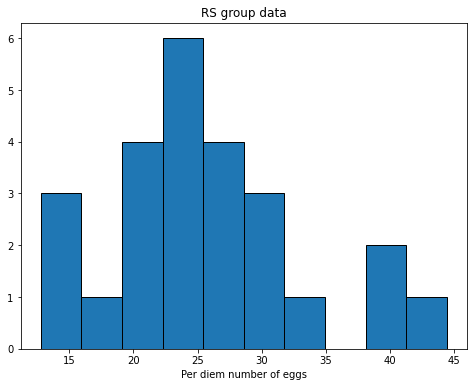

KS test for RS data: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=12.8, statistic_sign=-1)
KS test for normalized RS data: KstestResult(statistic=0.14094983019923957, pvalue=0.6522566408116208, statistic_location=-0.2043239701507003, statistic_sign=1)
lilliefors test for RS data: (0.13933626926411025, 0.23588980770989293)


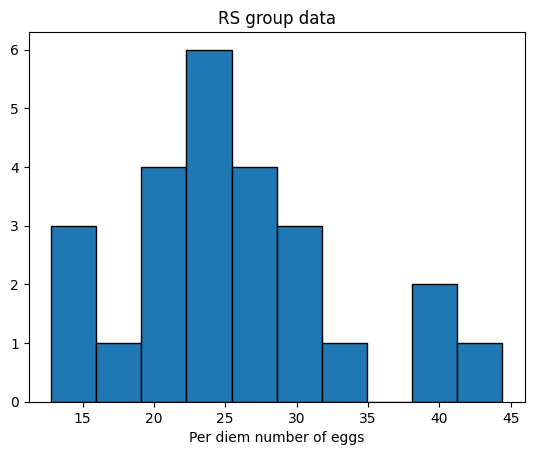

In [16]:
# Your code and figures go here
RSdata = dat[:,0]
plt.hist(RSdata,ec='black')
plt.title('RS group data')
plt.xlabel('Per diem number of eggs')

norm_RSdata = (RSdata - np.mean(RSdata)) / np.std(RSdata)

print('KS test for RS data:',stats.kstest(RSdata,stats.norm.cdf))
print('KS test for normalized RS data:',stats.kstest(norm_RSdata,stats.norm.cdf))
print('lilliefors test for RS data:', sm.stats.lilliefors(RSdata,'norm',pvalmethod='table'))

KS test for random normal data: KstestResult(statistic=0.9096233729720622, pvalue=8.139554884954586e-105, statistic_location=1.8752869765411373, statistic_sign=-1)
KS test for normalized random normal data: KstestResult(statistic=0.11953904028476686, pvalue=0.10565214687589511, statistic_location=-0.2521541457737353, statistic_sign=1)
lilliefors test for random normal data: (0.06619816581804594, 0.356103330888084)


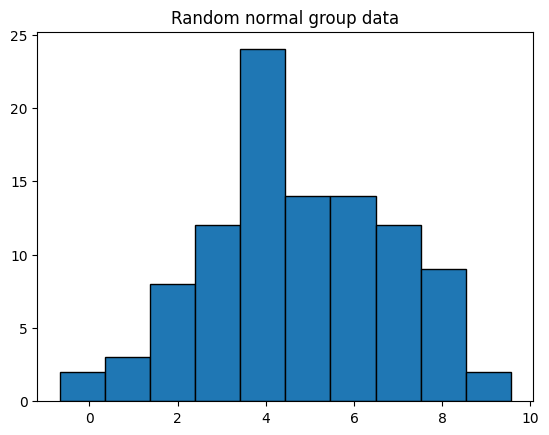

In [17]:
randomdata = np.random.normal(5,2,100)

plt.hist(randomdata,ec='black')
plt.title('Random normal group data')

norm_randomdata = (randomdata - 5) / 2

print('KS test for random normal data:',stats.kstest(randomdata,stats.norm.cdf))
print('KS test for normalized random normal data:',stats.kstest(norm_randomdata,stats.norm.cdf))
print('lilliefors test for random normal data:', sm.stats.lilliefors(randomdata,'norm',pvalmethod='table'))

\tcbset{ frame code={} center title, left=0pt, right=0pt, top=0pt, bottom=0pt, colback=green!50, colframe=white, width=\dimexpr\textwidth\relax, enlarge left by=0mm, boxsep=5pt, arc=0pt,outer arc=0pt, }
<div class="alert alert-success">
<span style="color:black">
\begin{tcolorbox}
    
The null hypothesis of these tests states that the data is normally distributed. The first result is the statistic of the test, the second is the p-value for this test. The lower the p-value, the greater the statistical significance of the observed difference.
First the data needs to be normalized before comparing it in the KS test. This is the reason why the p-value of the first (not normalized) KS test is significant for both the RS data and the random normal data. After normalisation, the p-value of the KS-test is not significant, which means the RS data is normally distributed. The Lilliefors test confirms this result. As expected, also the random normal data is normally distributed.
    
\end{tcolorbox}
    
</span>
</div>  

<div class="alert alert-info">

**Task**
    
Use the resampling technique to test wheter the RS-line data-samples represent a random subset of a normal distribution with the same mean and standard deviation of the given RS-line dataset. The question can be reformulated as follows: "How likely is it that we pick a subset of 25 samples with a mean corresponding to the given mean from a standard normal distribution with the same mean?"

To perform this analysis, you should first generate a normal distribution of 1000 datapoints with the same mean and standard deviation than the data from the RS-line. Then, pick 25 random samples (with replacement) from this distribution, calculate the mean of this datasample and store it in a vector. If the calculated mean is larger than that of the RS-dataset count 1, if not count 0. Repeat the 25-sample picking procedure 400 times in a loop. 

Afterwards, plot a histogram of the 400 means and check whether the distribution center is far away from the given mean of the RS-dataset. Additionally, calculate the probability with which the resampled means exceeded the given mean of the RS-dataset. 
- To pick a random sample out of a distribution without replacement use: `np.random.choice(data, size=X, replace=False, p=None)`
- To pick a random sample out of a distribution with replacement (i.e. allowing duplicates) use: `np.random.choice(data, size=X, replace=True, p=None)`

Write the code to perform this resampling approach for normality testing. Do the RS-datasamples stem from a normal distribution? With which certainty can you support/reject this statement? 
    
    
What your answer should look like:
    
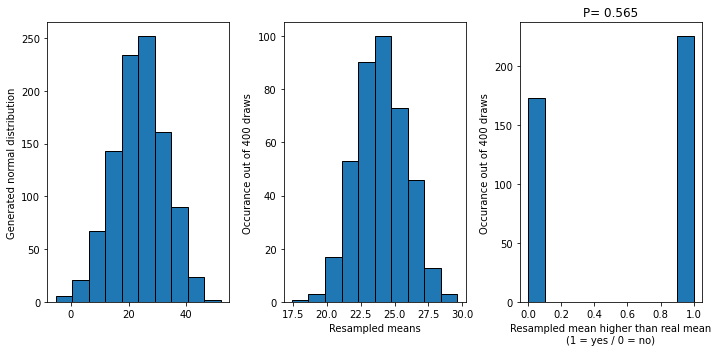

mean RSdata =  25.256000000000004


Text(0.5, 1.0, 'P = 0.400')

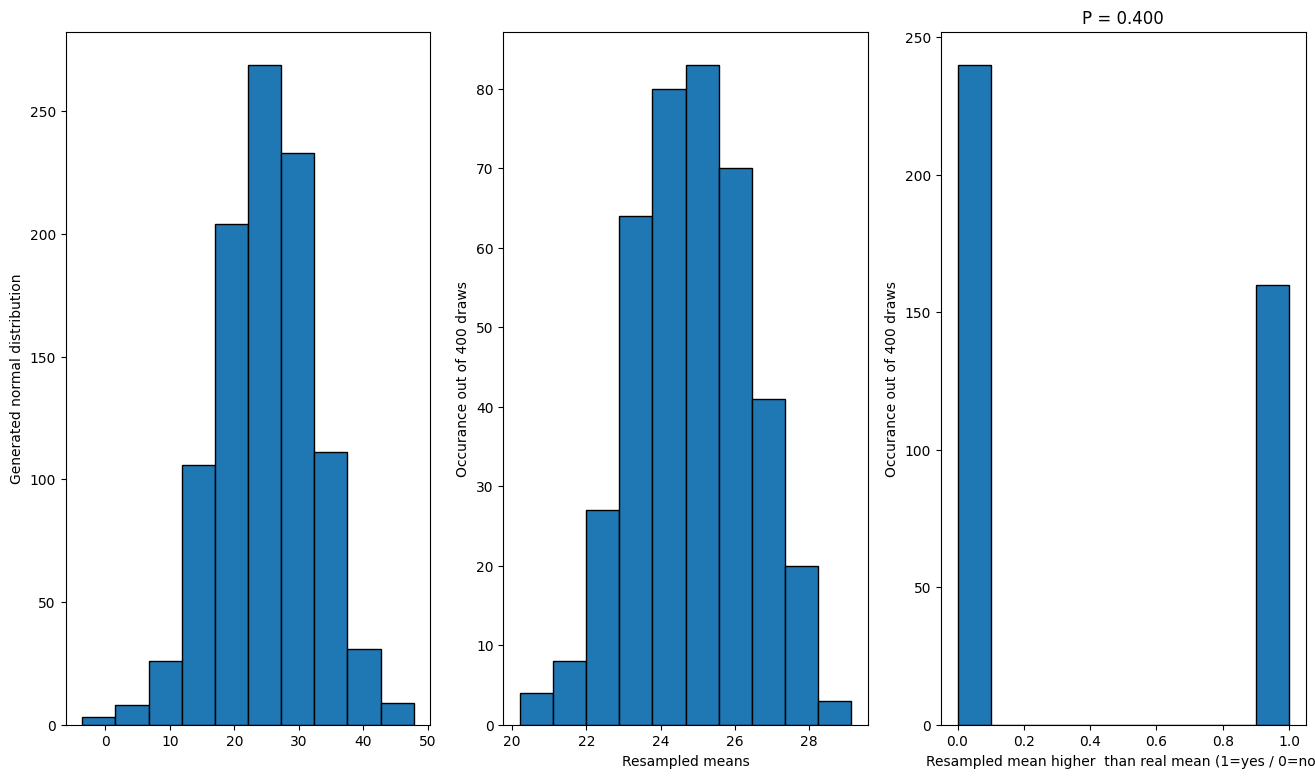

In [11]:
#your code and figures go here
print('mean RSdata = ',np.mean(RSdata))
data = np.random.normal(np.mean(RSdata),np.std(RSdata),1000)
N = 400
means = np.zeros(N)
for i in range(N):
    dataset = np.random.choice(data, size=25, replace=True, p=None)
    means[i] = np.mean(dataset)
r = np.where(means>np.mean(RSdata),1,0)

fig,ax = plt.subplots(1,3,figsize = (16,9))
ax[0].hist(data,ec='black')
ax[0].set_ylabel('Generated normal distribution')
ax[1].hist(means,ec='black')
ax[1].set_xlabel('Resampled means')
ax[1].set_ylabel('Occurance out of 400 draws')
ax[2].hist(r,ec='black')
ax[2].set_xlabel('Resampled mean higher  than real mean (1=yes / 0=no)')
ax[2].set_ylabel('Occurance out of 400 draws')
ax[2].set_title('P = %.3f'%(np.mean(r)))

\tcbset{ frame code={} center title, left=0pt, right=0pt, top=0pt, bottom=0pt, colback=green!50, colframe=white, width=\dimexpr\textwidth\relax, enlarge left by=0mm, boxsep=5pt, arc=0pt,outer arc=0pt, }
<div class="alert alert-success">
<span style="color:black">
\begin{tcolorbox}
    
On the second histogram, we see that distribution center lies very close to 25, the mean of the RS-dataset. The probability with which the resampled means exceeds the given mean of the RS-dataset lies close to 0.5.
We conclude that the data is very probably normally distributed.

\end{tcolorbox}
    
</span>
</div>  

### T-tests

There are several theories which attribute the cause of schizophrenia to changes in the dopamine substance in the central nervous system. In the considered study, 25 hospitalized schizophrenic patients were treated with antipsychotic medication and after a certain period they were either classified as psychotic (YES) or non-psychotic (NO) by the hospital staff based on their behavior. A sample of cerebrospinal fluid was taken from all patients and the dopamine-b hydroxylase (DHB) activity determined in units of nmol of protein. Is the DHB activity related to the presence/absence of schizophrenia?

In this exercise you will use/compare several techniques to test your hypothesis (paper t-test, python t-test, resampling t-test).

In [19]:
NO=[.0104,.0105,.0112,.0116,.0130,.0145,.0154,.0156,.0170,.0180,.0200,.0200,.0210,.0230,.0252] #the NO group
YES=[.0150,.0204,.0208,.0222,.0226,.0245,.0270,.0275,.0306,.0320] #the YES group

<div class="alert alert-info">
    
**Task**

- a) Use a standard paper-and-pen t-test to investigate whether DHB activity is related to schizophrenia (use the look-up table provided in the lecture notes). Is this a single or double-sided test? Relate the test outcome to your 0-hypothesis.  

- b) Look up how to use the `scipy.stats.ttest_ind` t-test and apply it to your exercise. What do the test outcomes mean?

- c) We can use a bootstrapping/resampling technique to test the same hypothesis by rephrasing the question as follows: "How likely is it that a differences equalling the mean difference between the two populations can be obtained by chance, when we pick two random YES and NO populations from one population that includes all individuals". This can be executed as follows: Make one population that has all data-points in it (use `np.concatenate`). From it, pick a random subset of YES observations (sampling with replacement N=15) and a random subset of NO observations (sampling with replacement N=10). Calculate the difference in the means of the two random YES and NO samples. If the difference in means is larger than the difference in means of the original YES and NO populations, count = 1, else count = 0. Repeat this procedure 400 times and calculate the probability of obtaining a randomly sampled mean difference larger than the actual mean difference. Do the YES and NO groups have significantly different DHP levels?

- d) Which one of the tests do you trust more? Plot the histograms of the YES and NO group to motivate your answer.
    
What your answer should look like:
    
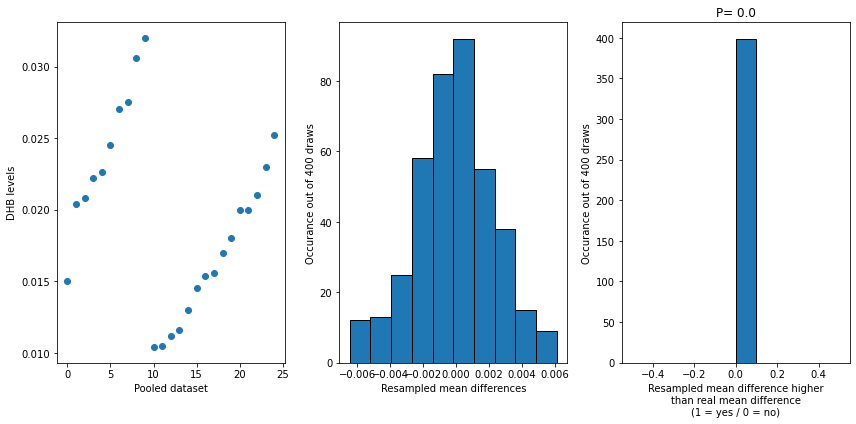

paper t-test t value =  4.106617696326662  with d.f. =  23
This corresponds to a p-value of 0.001
python t-test outcome:  Ttest_indResult(statistic=-3.936422120611183, pvalue=0.000658676096416126)


Text(0.5, 1.0, 'NO group')

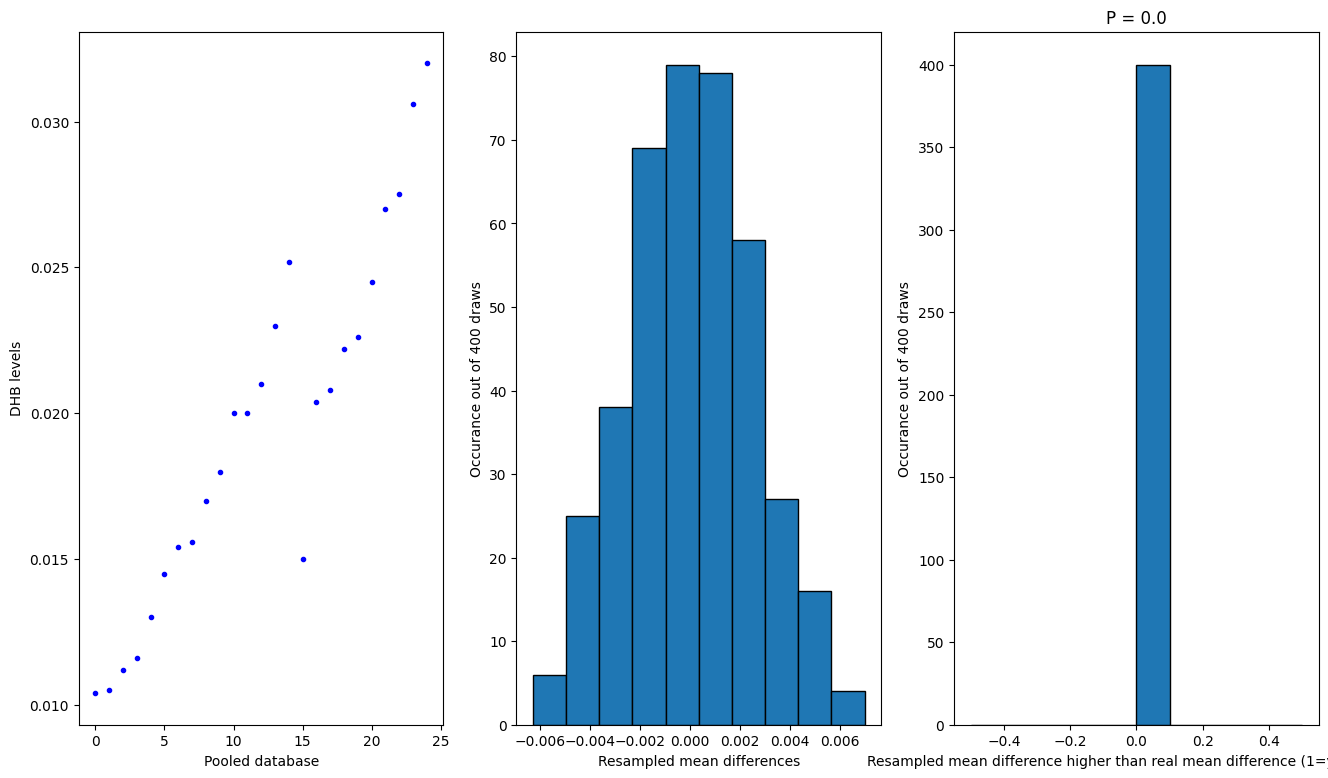

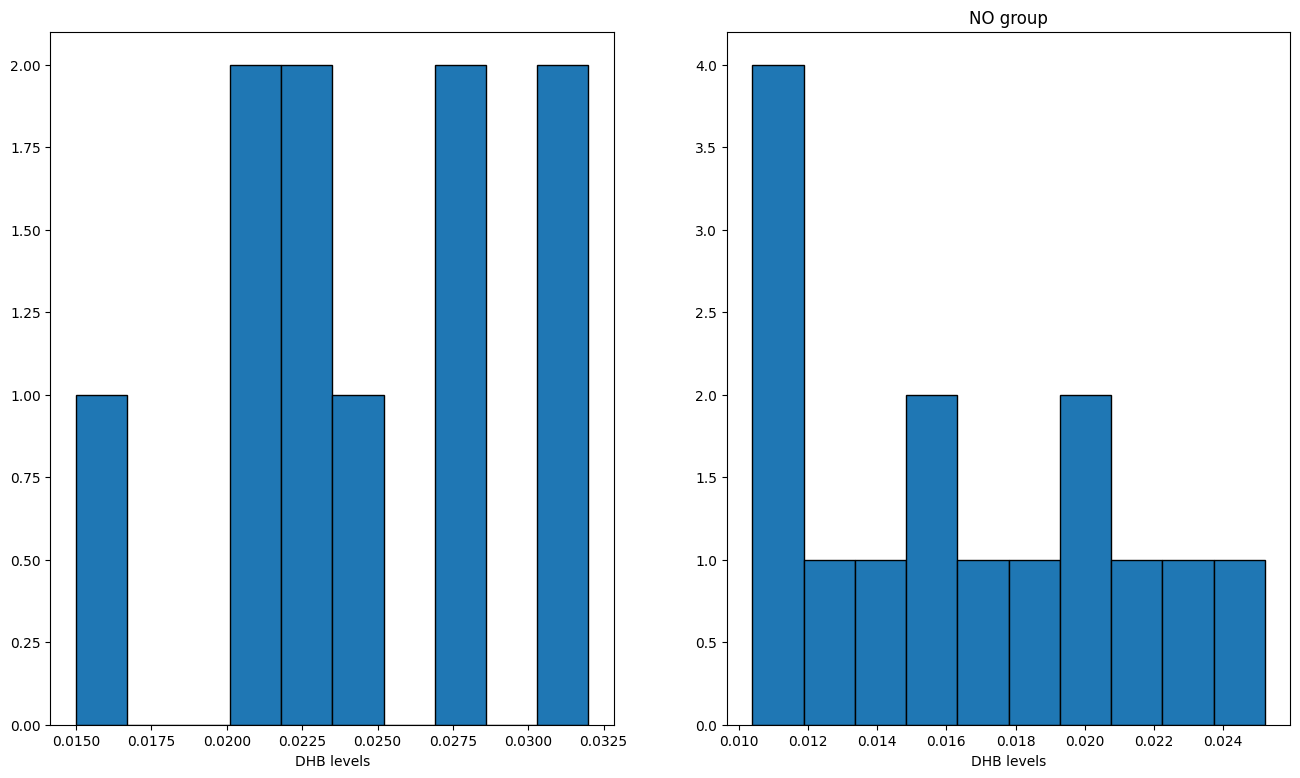

In [20]:
# Your code and figures go here
#a)paper t-test
n1,n2 = len(NO),len(YES)
s = np.sqrt(((n2-1)*np.std(YES)**2+(n1-1)*np.std(NO)**2)/(n1+n2-2))
t = (np.mean(YES)-np.mean(NO))/(s*np.sqrt(1/n1+1/n2))
print('paper t-test t value = ',t, ' with d.f. = ',n1+n2-2)
print('This corresponds to a p-value of 0.001')

#b)python t-test
print('python t-test outcome: ',stats.ttest_ind(NO,YES))

#c)resampling t-test
tot = np.concatenate((NO,YES))
n = 400
diff_means = np.zeros(n)
for i in range(n):
    yes = np.random.choice(tot, size=15, replace=True, p=None)
    no = np.random.choice(tot, size=10, replace=True, p=None)
    diff_means[i] = np.mean(yes) - np.mean(no)
r = np.where(diff_means>np.mean(YES)-np.mean(NO),1,0)

fig,ax = plt.subplots(1,3,figsize = (16,9))
ax[0].plot(tot,'b.')
ax[0].set_xlabel('Pooled database')
ax[0].set_ylabel('DHB levels')
ax[1].hist(diff_means,ec='black')
ax[1].set_xlabel('Resampled mean differences')
ax[1].set_ylabel('Occurance out of 400 draws')
ax[2].hist(r,ec='black')
ax[2].set_xlabel('Resampled mean difference higher than real mean difference (1=yes / 0=no)')
ax[2].set_ylabel('Occurance out of 400 draws')
ax[2].set_title('P = %.1f'%(np.mean(r)))

#d) Which test is most trustworthy?
fig,ax = plt.subplots(1,2,figsize = (16,9))
ax[0].hist(YES,ec='black')
ax[0].set_xlabel('DHB levels')
ax[1].set_title('YES group')
ax[1].hist(NO,ec='black')
ax[1].set_xlabel('DHB levels')
ax[1].set_title('NO group')

\tcbset{ frame code={} center title, left=0pt, right=0pt, top=0pt, bottom=0pt, colback=green!50, colframe=white, width=\dimexpr\textwidth\relax, enlarge left by=0mm, boxsep=5pt, arc=0pt,outer arc=0pt, }
<div class="alert alert-success">
<span style="color:black">
\begin{tcolorbox}
    
The different t-tests test the null hypothesis that two independent samples have the same mean. It is a two-sided t-test. The paper t-test results in a significant p-value of 0.001, which means we can reject the null hypothesis. 
    
The python t-test gives a statistic of -3.9364, which means that the mean of NO is smaller than the mean of YES. The corresponding p-values contributes 0.000658676, a very small and thus significant p-value. This confirms the results from the paper t-test.
    
In the resampling t-test, the distribution center of the mean differences lies very close to zero. The resampled mean difference is in no case higher than the real mean difference (P=0.0). We conclude that the DHB levels are on average larger in the YES-group than in the NO-group.
    
The resampling t-test is the most trustworthy since this test does not make assumptions about the underlying data-distributions. The histograms of the YES and NO groups don't indicate that the DHB levels in thes groups are normally distributed, which is assumed in the other t-tests.
    
\end{tcolorbox}
    
</span>
</div>  

### Correlations
The data-set represent the number of hours classes were attended (column 1) in the semester vs the number of times a student checked his/her phone for new messages during class (column 2).  Is there a correlation between the number of hours of classes were attended and the number of times a person checked their messages?

In [21]:
data = scipy.io.loadmat('set.mat') #the data will be in the form of a dictionary
D=data['set']

<div class="alert alert-info">
    
**Task**
    
- a) Have a first look at the dataset by plotting the columns against each other. Does the data look correlated?

- b) There are several available methods to calculate the correlation between these variables. The possible tests are: pearson correlation (`sci.stats.pearsonr`), Spearman correlation (`sci.stats.spearmanr`), and Kendal Tau (`sci.stats.kendalltau`). Look-up and evaluate the correlation-tests on the python help pages and apply them to your dataset. Answer the following questions: Which of the three tests is suited for the problem at hand (you can plot histograms to motivate your answer). Are the data significantly correlated, and what does the p-value mean in relation to the 0-hypothesis? 

- c) Lastly, apply a linear regression test to your dataset (`stats.linregress`) and use the outcomes of the test to plot linear fit to the data set (datapoints as 'o', and curve-fitting line as '-'). Calculate the residuals from the linear regression line, and check whether they are normally distributed, also check the meaning of the std_err value. Is the linear model a good fit to the dataset at hand and why? 
    
What your figures should look like:
    
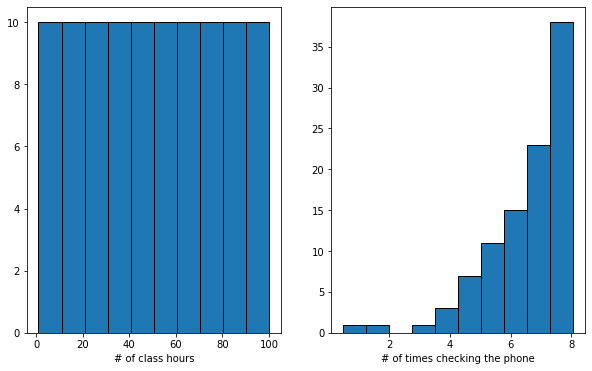

<div class="alert alert-info">

What your answer should look like:
    
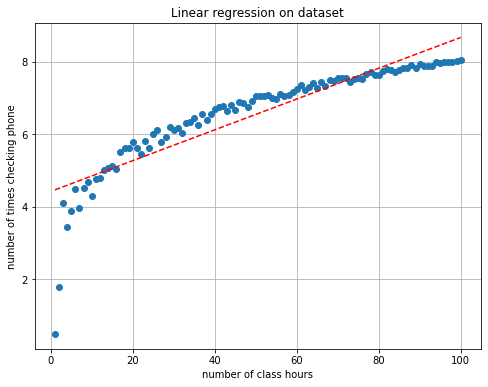

Pearson correlation: PearsonRResult(statistic=0.8943379561027064, pvalue=5.2490919720814345e-36)
Spearman correlation: SignificanceResult(statistic=0.9965436129564103, pvalue=1.030030284040977e-107)
Kendall Tau correlation: SignificanceResult(statistic=0.9543250577489396, pvalue=6.418510960634322e-45)
KS test on the residuals KstestResult(statistic=0.2683879260159724, pvalue=7.50444551274842e-07, statistic_location=0.6176958440575406, statistic_sign=1)


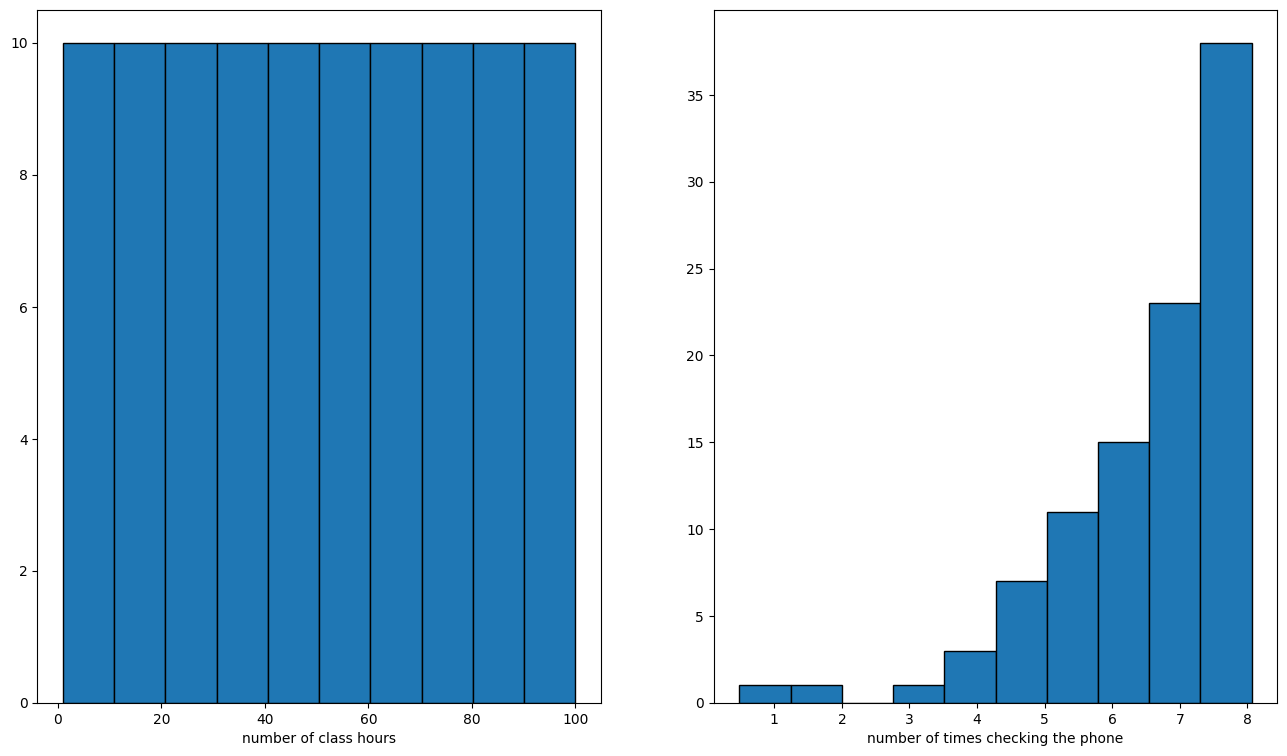

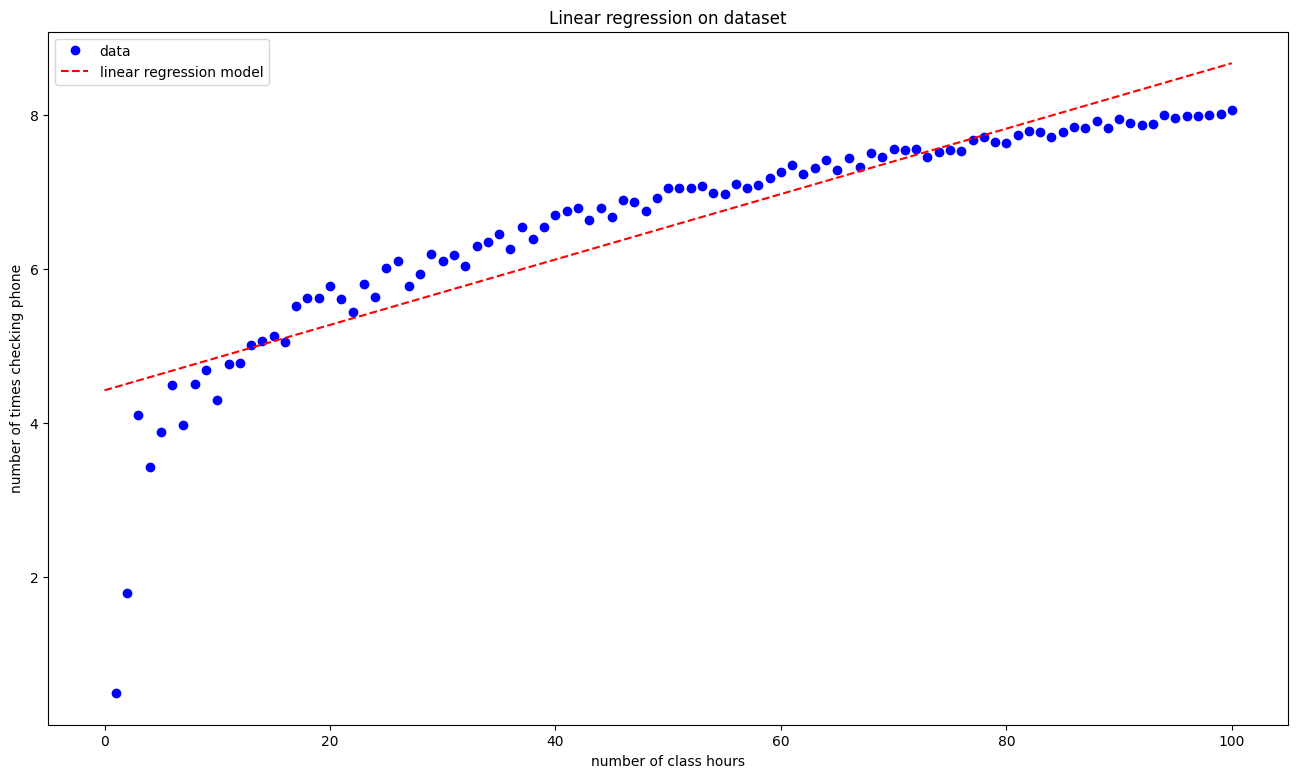

In [23]:
#Your code and figures go here
x,y = D[:,0], D[:,1]
#a) plot data
fig,ax = plt.subplots(1,2,figsize=(16,9))
ax[0].hist(x,ec='black')
ax[0].set_xlabel('number of class hours')
ax[1].hist(y,ec='black')
ax[1].set_xlabel('number of times checking the phone')

#b) correlation
print('Pearson correlation:',stats.pearsonr(x,y))
print('Spearman correlation:',stats.spearmanr(x,y))
print('Kendall Tau correlation:',stats.kendalltau(x,y))

#c) regression
X = np.linspace(0,100,100)
b1,b0,rvalue,pvalue,stderr = stats.linregress(x,y)
Y = b1*X+b0
res = y-Y
print('KS test on the residuals',stats.kstest(res,'norm'))

fig,ax = plt.subplots(figsize=(16,9))
ax.plot(x,y,'bo',X,Y,'r--')
ax.set_xlabel('number of class hours')
ax.set_ylabel('number of times checking phone')
ax.set_title('Linear regression on dataset')
ax.legend(['data','linear regression model'])

\tcbset{ frame code={} center title, left=0pt, right=0pt, top=0pt, bottom=0pt, colback=green!50, colframe=white, width=\dimexpr\textwidth\relax, enlarge left by=0mm, boxsep=5pt, arc=0pt,outer arc=0pt, }
<div class="alert alert-success">
<span style="color:black">
\begin{tcolorbox}
    
The Pearson test assumes that the data is normally distributed, which is not the case here. The Spearman test does not make assumptions about the underlying distribution but is only accurate for very large samples (>500 observations - here: 100 observations). The Kendall tau test is good for tied data. Even though there is a lack of datapoints, the Spearman test is the best because it doesn't make false assumptions about the distribution.
null hypothesis is that two sets of data are linearly uncorrelated.
All three tests indicate that there is a strong positive correlation (statistic close to one). The p-value corresponds to a test with null hypothesis stating there is no correlation. Since all three p-values are very small, we suspect significant correlation.
    
The linear regression model is not a really good fit, the graph shows another underlying structure in the data, maybe more logarithmic.
'stderr' is the standard error of the estimated slope (gradient), under the assumption of residual normality. The KS test on the residuals shows that these are probably not normally distributed.

\end{tcolorbox}
    
</span>
</div>  